In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# to connect to the db
from pymongo import MongoClient
from pymongo.server_api import ServerApi
import os
from dotenv import load_dotenv

load_dotenv()

True

In [2]:
client = MongoClient(os.environ['MONGODB_URI'], server_api=ServerApi('1'))
db = client['home-insight']
print('connected to the db')
collection = db['properties'].find({'Price': {'$gt': 0}})
print('finished the query')
data = pd.DataFrame(list(collection))

connected to the db
finished the query


In [3]:
data

,_id,index,Address,Price,Rooms,Bedrooms,Size
0,653c22d4b8dca5859ef5dfd5,3,Puteaux (92800),2950.0,5,3,100
1,653c22d4b8dca5859ef5dfd9,7,Rueil-Malmaison (92500),650.0,1,1,12
2,653c22d4b8dca5859ef5dfd4,2,Champigny-Sur-Marne (94500),830.0,1,1,13
3,653c22d4b8dca5859ef5dfd2,0,Afa (20167),780.0,2,1,50
4,653c22d4b8dca5859ef5dfd3,1,Bordeaux (33000),1000.0,2,1,42
...,...,...,...,...,...,...,...
5588,6548d2b4eb549a10b61ebf03,3222,Louveciennes (78430),1495.0,3,2,64
5589,6548d2b4eb549a10b61ebf0a,4060,Behren-Lès-Forbach (57460),950.0,5,3,135
5590,6548d2b4eb549a10b61ebf0b,4272,Montesson (78360),1265.0,4,2,68
5591,6548d2b4eb549a10b61ebf16,5358,Thiais (94320),430.0,1,1,10


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5593 entries, 0 to 5592
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   _id       5593 non-null   object 
 1   index     5593 non-null   int64  
 2   Address   5593 non-null   object 
 3   Price     5593 non-null   float64
 4   Rooms     5593 non-null   object 
 5   Bedrooms  5593 non-null   object 
 6   Size      5593 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 306.0+ KB


In [5]:
data.dropna(inplace=True)

In [6]:
data

,_id,index,Address,Price,Rooms,Bedrooms,Size
0,653c22d4b8dca5859ef5dfd5,3,Puteaux (92800),2950.0,5,3,100
1,653c22d4b8dca5859ef5dfd9,7,Rueil-Malmaison (92500),650.0,1,1,12
2,653c22d4b8dca5859ef5dfd4,2,Champigny-Sur-Marne (94500),830.0,1,1,13
3,653c22d4b8dca5859ef5dfd2,0,Afa (20167),780.0,2,1,50
4,653c22d4b8dca5859ef5dfd3,1,Bordeaux (33000),1000.0,2,1,42
...,...,...,...,...,...,...,...
5588,6548d2b4eb549a10b61ebf03,3222,Louveciennes (78430),1495.0,3,2,64
5589,6548d2b4eb549a10b61ebf0a,4060,Behren-Lès-Forbach (57460),950.0,5,3,135
5590,6548d2b4eb549a10b61ebf0b,4272,Montesson (78360),1265.0,4,2,68
5591,6548d2b4eb549a10b61ebf16,5358,Thiais (94320),430.0,1,1,10


In [52]:
from sklearn.model_selection import train_test_split

# Extract postal code from 'Address' column in the original data
data['PostalCode'] = data['Address'].str.extract('\((.*?)\)', expand=False)

# Convert 'PostalCode' to numeric type and handle errors
data['PostalCode'] = pd.to_numeric(data['PostalCode'], errors='coerce')

# Convert 'PostalCode' to integer type
data['PostalCode'] = data['PostalCode'].astype(int)

data['Rooms'] = pd.to_numeric(data['Rooms'], errors='coerce')
data['Rooms'] = data['Rooms'].astype(int)

data['Bedrooms'] = pd.to_numeric(data['Bedrooms'], errors='coerce')
data['Bedrooms'] = data['Bedrooms'].astype(int)

data['Size'] = pd.to_numeric(data['Size'], errors='coerce')
data['Size'] = data['Size'].astype(int)

# Drop rows with NaN values in 'PostalCode' column
data = data.dropna(subset=['PostalCode'])
data = data.dropna(subset=['Rooms'])
data = data.dropna(subset=['Bedrooms'])
data = data.dropna(subset=['Size'])

data.dropna(inplace=True)
x = data.drop(['Price', 'index', '_id', 'Address'],axis=1)
# We are dropping the price column because we want to predict the price

y = data['Price']

<>:4: SyntaxWarning: invalid escape sequence '\('
<>:4: SyntaxWarning: invalid escape sequence '\('
/var/folders/s9/jjtg4y713w12rs4msl95_nfr0000gn/T/ipykernel_12377/3372368842.py:4: SyntaxWarning: invalid escape sequence '\('
  data['PostalCode'] = data['Address'].str.extract('\((.*?)\)', expand=False)


In [53]:
x

,Rooms,Bedrooms,Size,PostalCode
0,5,3,100,92800
1,1,1,12,92500
2,1,1,13,94500
3,2,1,50,20167
4,2,1,42,33000
...,...,...,...,...
5588,3,2,64,78430
5589,5,3,135,57460
5590,4,2,68,78360
5591,1,1,10,94320


In [54]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [55]:
train_data = pd.concat([x_train,y_train], axis=1)
# we do specify axis=1 because we want to concat along the columns

In [56]:
train_data

,Rooms,Bedrooms,Size,PostalCode,Price
1702,3,2,49,34250,850.0
1067,2,1,63,92150,1990.0
409,2,1,31,92500,950.0
4382,4,3,98,92200,3300.0
5149,4,2,105,83530,1650.0
...,...,...,...,...,...
3900,3,2,59,94800,1400.0
5558,1,1,30,10100,360.0
517,2,1,40,95160,920.0
3954,2,1,30,76,510.0


array([[<Axes: title={'center': 'Rooms'}>,
        <Axes: title={'center': 'Bedrooms'}>],
       [<Axes: title={'center': 'Size'}>,
        <Axes: title={'center': 'PostalCode'}>],
       [<Axes: title={'center': 'Price'}>, <Axes: >]], dtype=object)

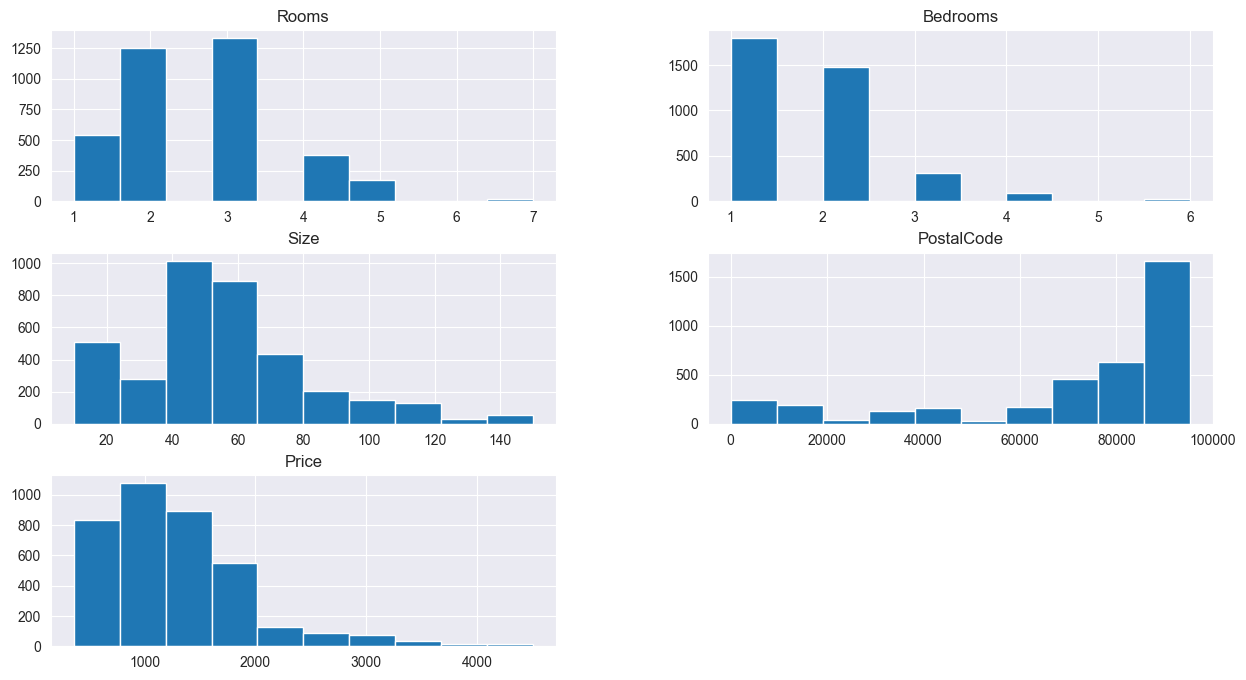

In [57]:
train_data.hist(figsize=(15,8))

In [58]:
train_data.corr()

,Rooms,Bedrooms,Size,PostalCode,Price
Rooms,1.000000,0.908277,0.873878,-0.077201,0.554592
Bedrooms,0.908277,1.000000,0.753735,0.002706,0.413585
Size,0.873878,0.753735,1.000000,-0.098226,0.640046
PostalCode,-0.077201,0.002706,-0.098226,1.000000,0.152223
Price,0.554592,0.413585,0.640046,0.152223,1.000000


<Axes: >

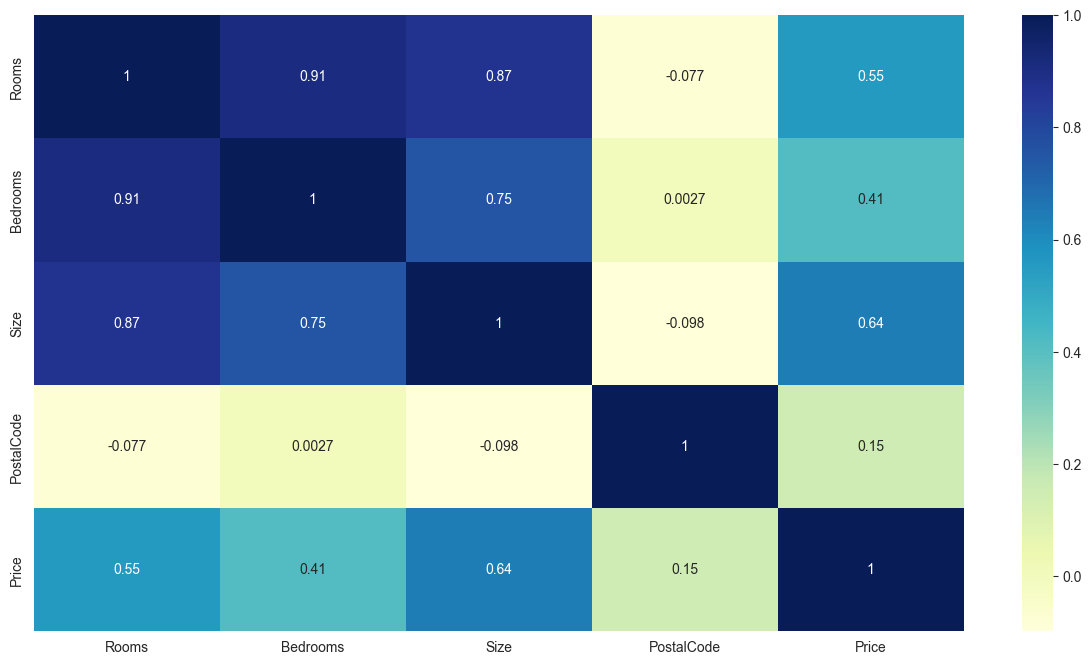

In [59]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap='YlGnBu')

In [60]:
train_data['Rooms'] = np.log(train_data['Rooms'] + 1)
train_data['Bedrooms'] = np.log(train_data['Bedrooms'] + 1)
train_data['Size'] = np.log(train_data['Size'] + 1)
train_data['PostalCode'] = np.log(train_data['PostalCode'] + 1)

array([[<Axes: title={'center': 'Rooms'}>,
        <Axes: title={'center': 'Bedrooms'}>],
       [<Axes: title={'center': 'Size'}>,
        <Axes: title={'center': 'PostalCode'}>],
       [<Axes: title={'center': 'Price'}>, <Axes: >]], dtype=object)

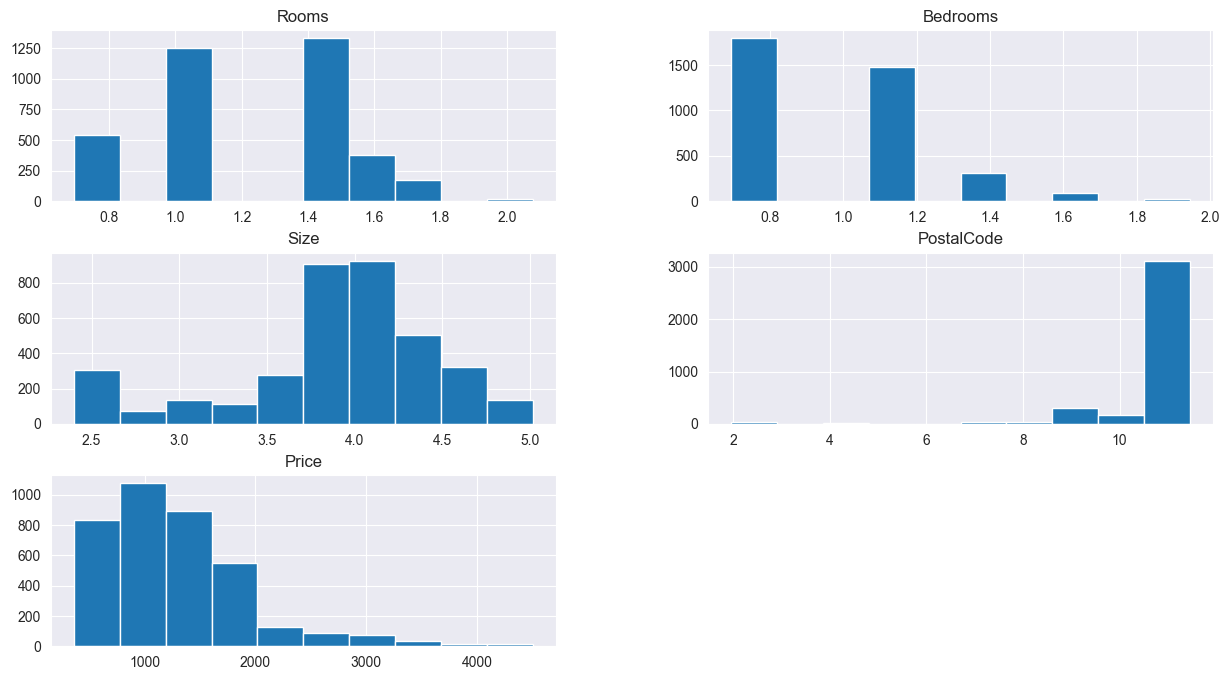

In [61]:
train_data.hist(figsize=(15,8))

In [62]:
train_data['bedroom_ratio'] = train_data['Bedrooms'] / train_data['Rooms']

<Axes: >

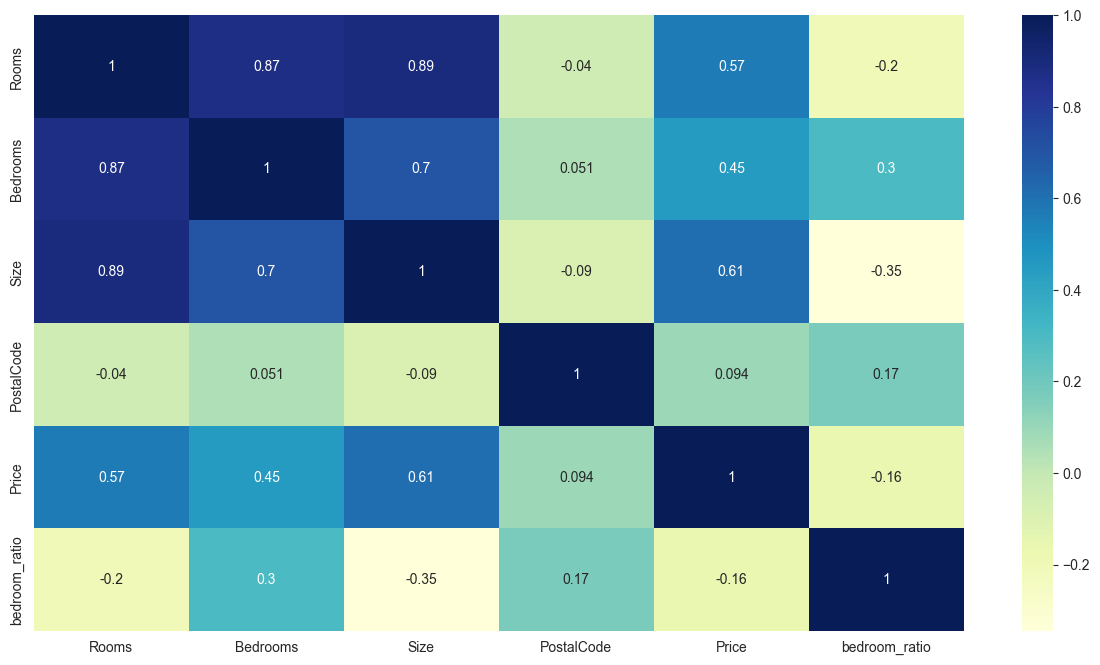

In [63]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap='YlGnBu')

In [72]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_train, y_train = train_data.drop(['Price'], axis=1), train_data['Price']

x_train_s = scaler.fit_transform(x_train)

reg = LinearRegression()
reg.fit(x_train_s, y_train)

LinearRegression()

In [73]:
test_data = x_test.join(y_test)
test_data['Rooms'] = np.log(test_data['Rooms'] + 1)
test_data['Bedrooms'] = np.log(test_data['Bedrooms'] + 1)
test_data['Size'] = np.log(test_data['Size'] + 1)
test_data['PostalCode'] = np.log(test_data['PostalCode'] + 1)
test_data['bedroom_ratio'] = test_data['Bedrooms'] / test_data['Rooms']


In [74]:
x_test, y_test = test_data.drop(['Price'], axis=1), test_data['Price']


In [75]:
x_test_s = scaler.transform(x_test)

In [76]:
reg.score(x_test_s, y_test)

-13.05025694246508

In [77]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(x_train_s, y_train)

RandomForestRegressor()

In [79]:
forest.score(x_test_s, y_test)

/Users/aoufarfares/Documents/GitHub/home-insight/venv/lib/python3.12/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


-1.456203044428349

In [85]:
from sklearn.model_selection import GridSearchCV

forest = RandomForestRegressor()

param_grid = {
    'n_estimators': [30, 50, 100],
    'max_features': [8, 12, 20],
    'min_samples_split': [2, 4, 6, 8],
    'min_samples_leaf': [1, 2, 5, 10, 15]
}

grid_search = GridSearchCV(forest, param_grid, cv=5, scoring="neg_mean_squared_error", return_train_score=True)

grid_search.fit(x_train_s, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [8, 12, 20],
                         'min_samples_leaf': [1, 2, 5, 10, 15],
                         'min_samples_split': [2, 4, 6, 8],
                         'n_estimators': [30, 50, 100]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [86]:
best_forest = grid_search.best_estimator_

In [87]:
best_forest.score(x_test_s, y_test)

-1.4602009341691216